# Tutorial 11 K-means Clustering

References
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/modules/clustering.html

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

## sklearn.cluster.KMeans

```python
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, 
                             random_state=None,copy_x=True, algorithm='auto')
```

### Parameters
- **n_clusters: int, default=8**

    The number of clusters to form as well as the number of centroids to generate.


- **init{'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'**

    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.
    

- **n_init: int, default=10**

    Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.


- **max_iter: int, default=300**

    Maximum number of iterations of the k-means algorithm for a single run.


- **tol: float, default=1e-4**

    Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.


- **random_state: int, RandomState instance or None, default=None**

    Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.


- **algorithm{"auto", "full", "elkan"}, default="auto"**

    K-means algorithm to use. The classical EM-style algorithm is “full”. The “elkan” variation is more efficient on data with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

### Attributes

- **cluster_centers_: ndarray of shape (n_clusters, n_features)**

    Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.


- **labels_: ndarray of shape (n_samples,)**

    Labels of each point


- **inertia_: float**

    Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.


- **n_iter_: int**

    Number of iterations run.


- **n_features_in_: int**

    Number of features seen during fit.

## Example

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [2]:
# Labels of each point
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [3]:
# Coordinates of cluster centers
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [4]:
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

16.0

In [5]:
# Predict the closest cluster each sample in X_new belongs to
X_new = np.array([[0, 0], [12, 3]])
kmeans.predict(X_new)

array([1, 0])

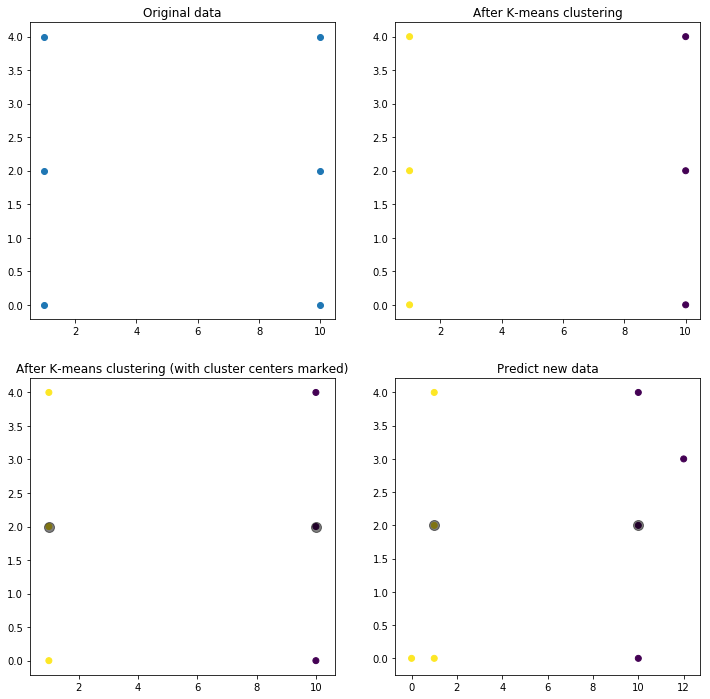

In [6]:
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:,0], X[:,1])
plt.title("Original data")

plt.subplot(222)
plt.scatter(X[:,0], X[:,1], c=kmeans.fit_predict(X))
plt.title("After K-means clustering")

plt.subplot(223)
plt.scatter(X[:,0], X[:,1], c=kmeans.fit_predict(X))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=100, alpha=0.5)
plt.title("After K-means clustering (with cluster centers marked)")

plt.subplot(224)
plt.scatter(X[:,0], X[:,1], c=kmeans.fit_predict(X))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=100, alpha=0.5)
plt.scatter(X_new[:,0], X_new[:,1], c=kmeans.predict(X_new))
plt.title("Predict new data")

plt.show()

## Demonstration of k-means assumptions (1)

References

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. In the first three plots, the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.

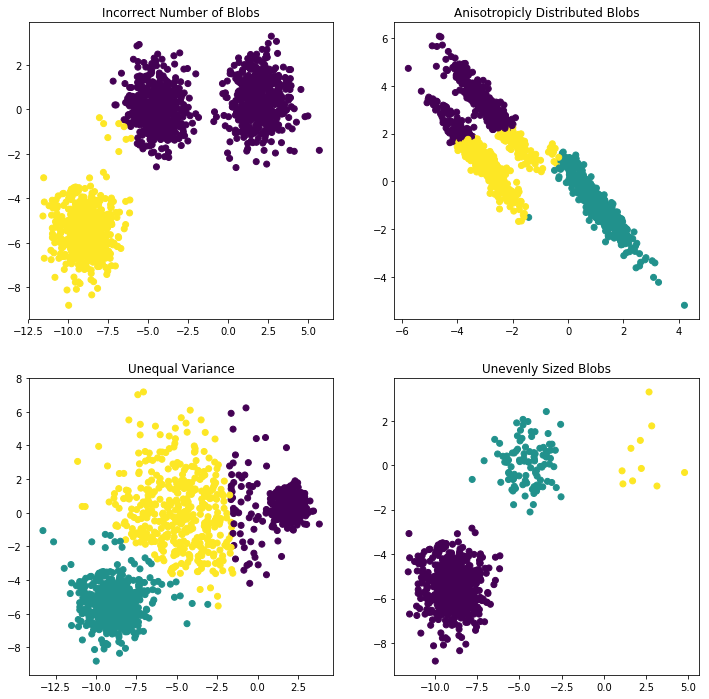

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

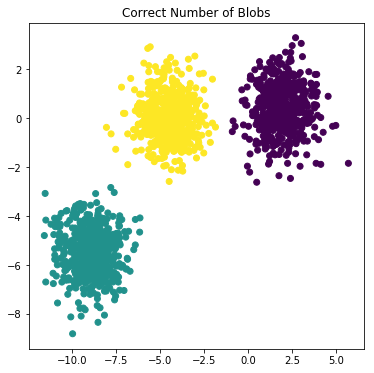

In [8]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Correct Number of Blobs")
plt.show()

In [9]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

References
- https://stackoverflow.com/questions/54434946/generate-anisotropic-data-in-sklearn
- https://math.stackexchange.com/questions/78137/decomposition-of-a-nonsquare-affine-matrix

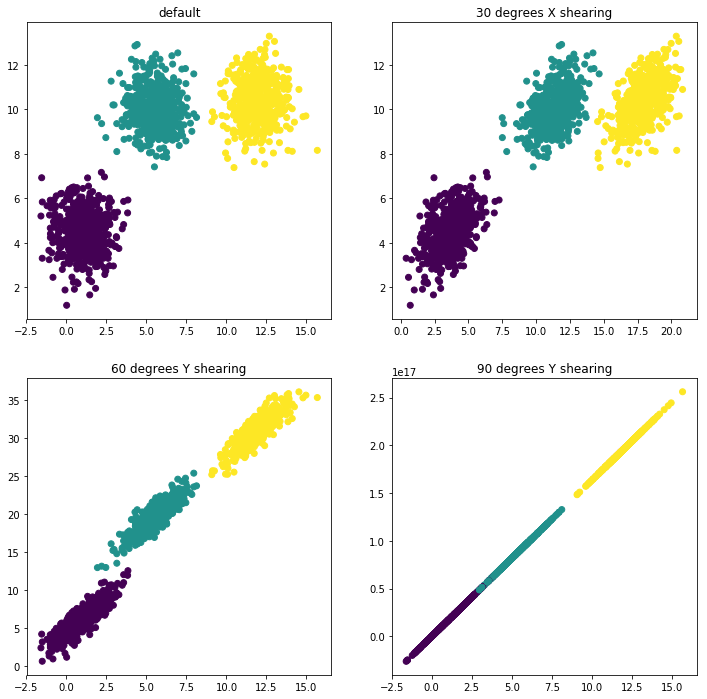

In [10]:
# Anisotropicly distributed data
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples,
                  random_state=random_state, center_box=(0, 20))


plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('default')



plt.subplot(222)

theta = np.radians(30)
t = np.tan(theta)
shear_x = np.array(((1, t), (0, 1))).T

X_rotated = X.dot(shear_x)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], c=y)
plt.title('%1.f degrees X shearing' % np.degrees(theta))


plt.subplot(223)

theta = np.radians(60)
t = np.tan(theta)

shear_y = np.array(((1, 0), (t, 1))).T

X_rotated = X.dot(shear_y)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], c=y)
plt.title('%1.f degrees Y shearing' % np.degrees(theta))


plt.subplot(224)

theta = np.radians(90)
t = np.tan(theta)

shear_y = np.array(((1, 0), (t, 1))).T

X_rotated = X.dot(shear_y)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], c=y)
plt.title('%1.f degrees Y shearing' % np.degrees(theta))

plt.show()

## Demonstration of k-means assumptions (2)

References
- https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization.

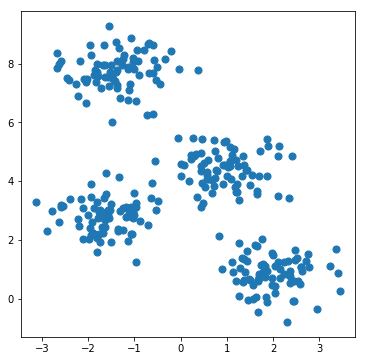

In [11]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

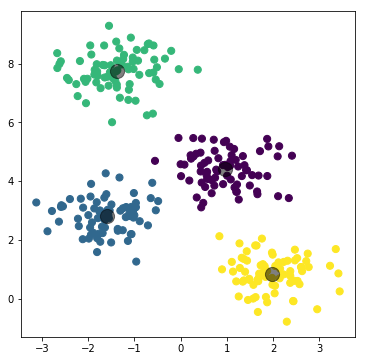

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. But the globally optimal result may not be achieved.

The following is a very basic implementation of k-means algorithm:

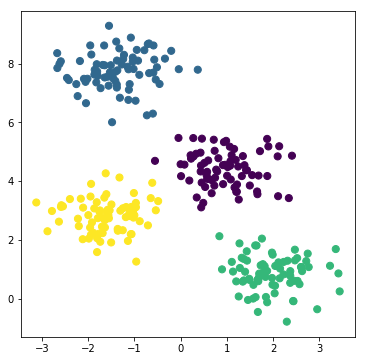

In [14]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels


centers, labels = find_clusters(X, 4)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

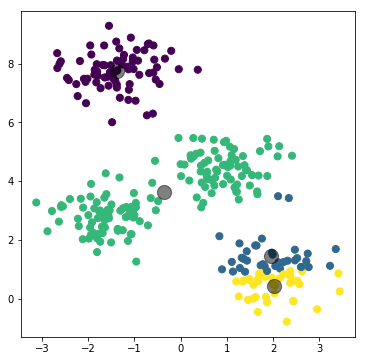

In [15]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In this case, it does not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the `n_init` parameter, which defaults to 10).

Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data. For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters:

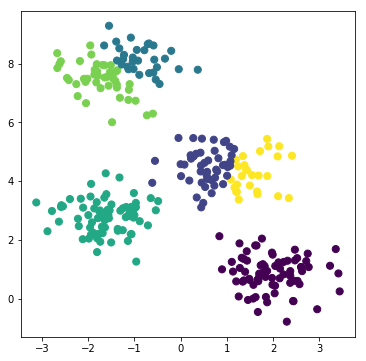

In [16]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

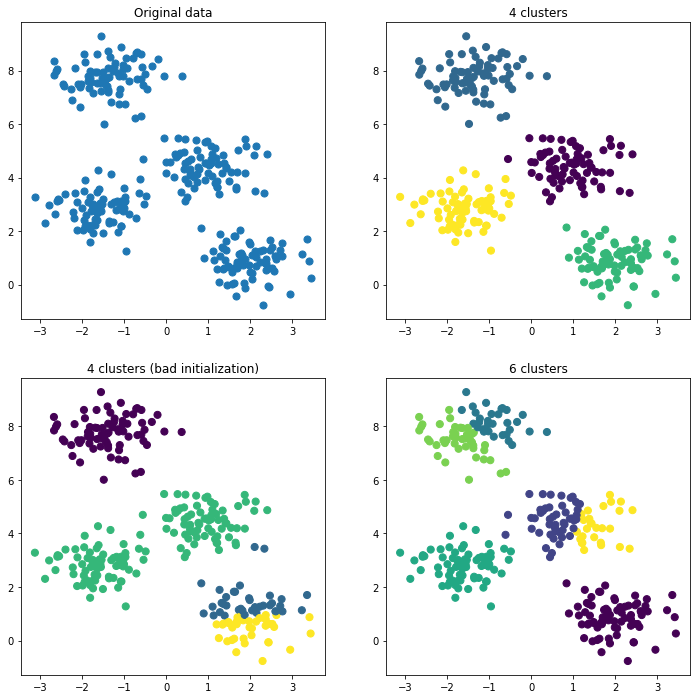

In [17]:
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Original data")

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.title("4 clusters")

plt.subplot(223)
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("4 clusters (bad initialization)")

plt.subplot(224)
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("6 clusters")

plt.show()

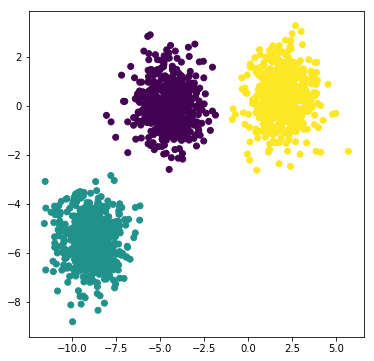

In [18]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

def kmeans(data, k, tol, max_iter):
    labels = np.zeros(len(data))
    C = np.random.random((k, len(data[0])))
    for i in range(max_iter):
        labels = pred_label(data, C)
        centers = center(data, labels, C)
        dist = distance(C, centers)
        if dist < tol:
            break
        C = centers

    return labels


def pred_label(data, C):
    n = len(data)
    k = len(C)
    d = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            d[i][j] = np.dot(data[i]-C[j], data[i]-C[j])
    labels = np.argmin(d, axis=1)
    return labels


def distance(data, C):
    n = len(data)
    k = len(C)
    d = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            d[i][j] = np.dot(data[i]-C[j], data[i]-C[j])
    return np.sqrt(np.sum(d))


def center(data, labels, c):
    c = np.zeros(c.shape)
    for i, n in zip(labels, range(len(labels))):
          c[i] = c[i] + data[n]
    for i in np.arange(0, len(c)):
        a = np.sum(labels == i)
        c[i] = c[i] / a
    return c


y_pred = kmeans(X, 3, 2, 50)

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

## Nonlinear cluster boundary

References
- https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

K-means is limited to linear cluster boundaries

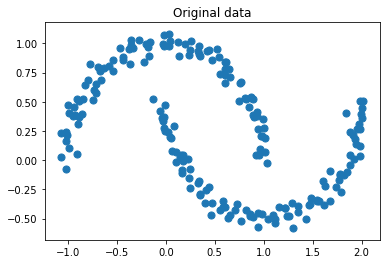

In [19]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Original data")
plt.show()

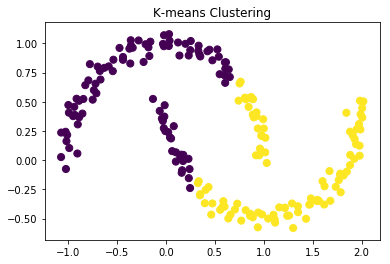

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("K-means Clustering")
plt.show()

This is similar to the situation in Support Vector Machines, where we used a kernel transformation to project the data into a higher dimension where a linear separation is possible. We might use the same trick to allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in Scikit-Learn within the `SpectralClustering` estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:

D:\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


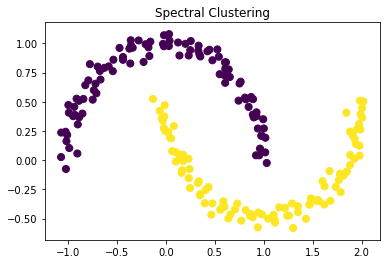

In [21]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = spectral.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Spectral Clustering")
plt.show()

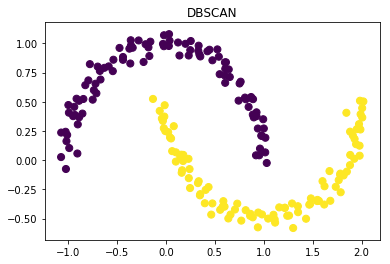

In [22]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3)
labels = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("DBSCAN")
plt.show()

We see that with this kernel transform approach, the kernelized k-means is able to find the more complicated nonlinear boundaries between clusters.